<a href="https://colab.research.google.com/github/murtazaplumber/ABC/blob/main/ass2_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Set a random seed for reproducibility
np.random.seed(42)


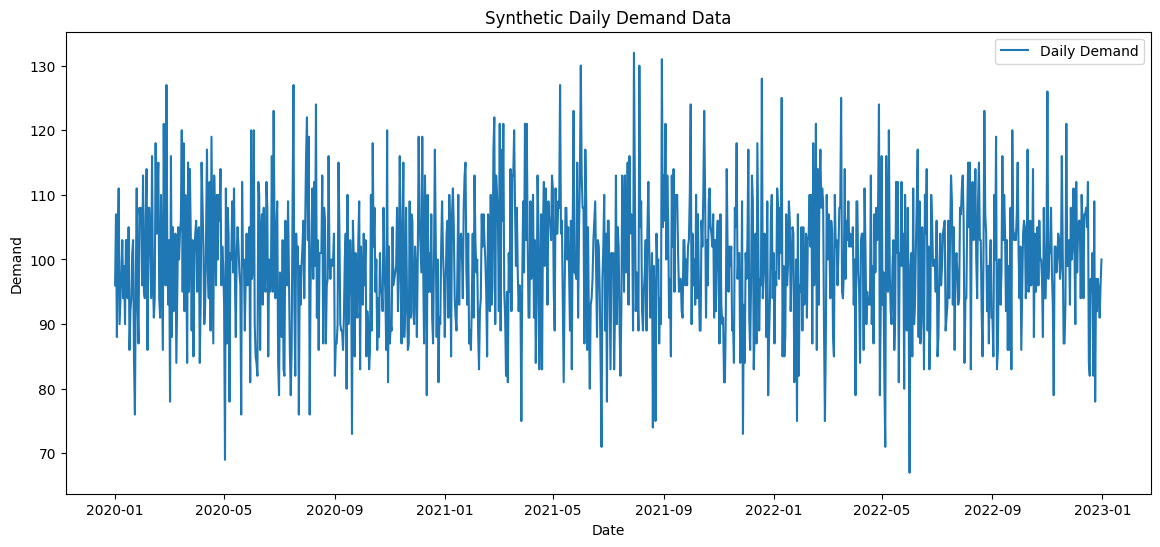

In [2]:
# Generate synthetic demand data
date_rng = pd.date_range(start='2020-01-01', end='2022-12-31', freq='D')
demand_data = np.random.poisson(lam=100, size=(len(date_rng)))
df = pd.DataFrame(demand_data, index=date_rng, columns=['Demand'])

# Visualize the synthetic demand data
plt.figure(figsize=(14, 6))
plt.plot(df['Demand'], label='Daily Demand')
plt.title('Synthetic Daily Demand Data')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()


In [3]:
# Normalize the demand data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Create sequences
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Define time step
time_step = 30  # 30 days of data
X, y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.1213 - val_loss: 0.0247
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0300 - val_loss: 0.0244
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0282 - val_loss: 0.0243
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0308 - val_loss: 0.0244
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0295 - val_loss: 0.0243
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0293 - val_loss: 0.0247
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0331 - val_loss: 0.0246
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0271 - val_loss: 0.0262
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0294 - val_loss: 0.0240
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0282 - val_loss: 0.0240
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0268 - val_loss: 0.0241
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0285 - val_l

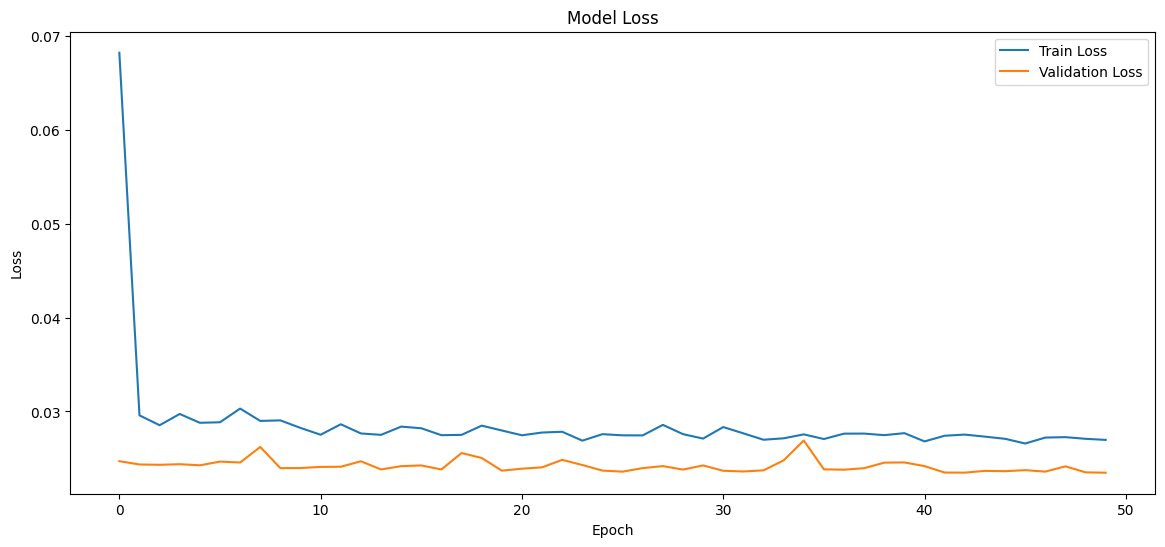

In [5]:
# Plot training & validation loss values
plt.figure(figsize=(14, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


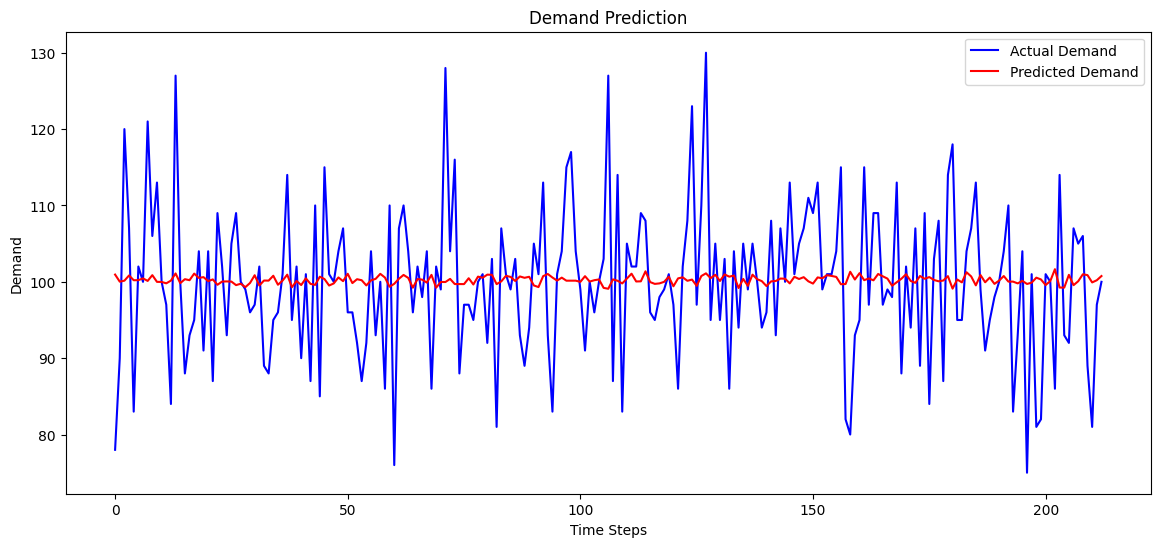

In [6]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)

# Prepare test data for comparison
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions vs actual values
plt.figure(figsize=(14, 6))
plt.plot(y_test_scaled, label='Actual Demand', color='blue')
plt.plot(predictions, label='Predicted Demand', color='red')
plt.title('Demand Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Demand')
plt.legend()
plt.show()
